## Tutoriel : interagir avec le système de stockage S3 du SSP Cloud (MinIO)

In [36]:
import os
import pandas as pd
import s3fs
import zipfile

### Récupérer les données d'un challenge

### Analyse du premier dataset

In [37]:
dfall = pd.read_json('data/all.jsonl', lines=True)

In [38]:
dfall.drop(['index'], axis=1, inplace=True)
dfall.value_counts("source")

source
reddit_eli5    17112
finance         3933
medicine        1248
open_qa         1187
wiki_csai        842
Name: count, dtype: int64

In [39]:
dfall.head()

,question,human_answers,chatgpt_answers,source
0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,reddit_eli5
1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,reddit_eli5
2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,reddit_eli5
3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,reddit_eli5
4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,reddit_eli5


In [40]:
dfall

,question,human_answers,chatgpt_answers,source
0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,reddit_eli5
1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,reddit_eli5
2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,reddit_eli5
3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,reddit_eli5
4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,reddit_eli5
...,...,...,...,...
24317,Is rise in pressure from 116/66 to 140/80 norm...,[Hello!Welcome and thank you for asking on HCM...,[It's not uncommon for blood pressure to fluct...,medicine
24318,What could cause a painless lump in the right ...,"[Hi, * As per my surgical experience, the issu...",[There are several possible causes of a painle...,medicine
24319,Can Acutret be given to a child for treatment ...,[Although it is difficult to comment whether A...,[It is not appropriate for me to recommend a s...,medicine
24320,Are BP of 119/65 and pulse of 35 causes for co...,[Welcome and thank you for asking on HCM! I ha...,[It is not uncommon for people with rheumatoid...,medicine


Slicing des données en fonction du secteur

In [41]:
dfmedecine = dfall[dfall.source=="medicine"]

In [42]:
dfmedecine.drop(['source'], axis=1, inplace=True)
dfmedecine.head()

/tmp/ipykernel_83149/886837594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmedecine.drop(['source'], axis=1, inplace=True)


,question,human_answers,chatgpt_answers
23074,Does Primolut N taken during pregnancy affect ...,"[Hi, Thanks for the query. I understand yo...",[It is not recommended to use Primolut N durin...
23075,Bloating and pain on right lower abdomen. Shou...,"[Hello,Thanks for the query to H.C.M. Forum.Pa...",[If you are experiencing abdominal pain and bl...
23076,Is chest pain related to intake of clindamycin...,"[Hello, The use of Clindamycin can cause stoma...",[It is possible that chest pain could be relat...
23077,Q. Noticed a yellowish sag in the gums of my 1...,[Hello. Revert back with the photos to a denti...,[It is difficult to accurately diagnose a cond...
23078,"Suggest remedy for low grade fever, hot and co...","[Hi Dear,Welcome to Healthcaremagic Team.Under...",[I'm sorry to hear that you're feeling sick. I...


In [43]:
dffinance = dfall[dfall.source=="finance"]

In [44]:
dffinance.drop(['source'], axis=1, inplace=True)
dffinance.head()

/tmp/ipykernel_83149/3504174499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinance.drop(['source'], axis=1, inplace=True)


,question,human_answers,chatgpt_answers
19141,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...
19142,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...
19143,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...
19144,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...
19145,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...


In [45]:
dfopen_qa = dfall[dfall.source=="open_qa"]

In [46]:
dfopen_qa.drop(['source'], axis=1, inplace=True)
dfopen_qa.head()

/tmp/ipykernel_83149/3018551293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfopen_qa.drop(['source'], axis=1, inplace=True)


,question,human_answers,chatgpt_answers
17112,what composer used sound mass,"[Composers and works include Barbara Kolb , Pa...",[Sound mass is a term used to describe a type ...
17113,where did the persian war take place,[The Greco-Persian Wars (also often called the...,[The Persian Wars were a series of conflicts f...
17114,what are add ons,"[Plug-in (computing) , a piece of software whi...","[Add-ons, also known as extensions or plug-ins..."
17115,how does a dredge work?,[Dredging is an excavation activity or operati...,[A dredge is a piece of equipment that is used...
17116,what classes are considered humanities,[The humanities are academic disciplines that ...,[Humanities are academic disciplines that stud...


In [47]:
dfwiki_csai = dfall[dfall.source=="wiki_csai"]

In [48]:
dfwiki_csai.drop(['source'], axis=1, inplace=True)
dfwiki_csai.head()

/tmp/ipykernel_83149/3293275135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwiki_csai.drop(['source'], axis=1, inplace=True)


,question,human_answers,chatgpt_answers
18299,"Please explain what is ""Animal cognition""",[Animal cognition encompasses the mental capac...,[Animal cognition refers to the mental capacit...
18300,"Please explain what is ""Human intelligence""",[Human intelligence is the intellectual capabi...,[Human intelligence is the mental ability to t...
18301,"Please explain what is ""Oxford English Diction...",[The Oxford English Dictionary (OED) is the fi...,[The Oxford English Dictionary (OED) is a comp...
18302,"Please explain what is ""Oxford University Press""",[Oxford University Press (OUP) is the universi...,[Oxford University Press (OUP) is a department...
18303,"Please explain what is ""AI applications""",[Artificial intelligence (AI) has been used in...,[AI applications are computer systems that are...


In [49]:
dfreddit_eli5=dfall[dfall.source=="reddit_eli5"]


In [50]:
dfreddit_eli5.drop(['source'], axis=1, inplace=True)
dfreddit_eli5.head()

/tmp/ipykernel_83149/818022564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreddit_eli5.drop(['source'], axis=1, inplace=True)


,question,human_answers,chatgpt_answers
0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...
1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...
2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...
3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...
4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...


Prpportion en fonction de chaque secteur

<Axes: title={'center': 'Proportion source'}, xlabel='source'>

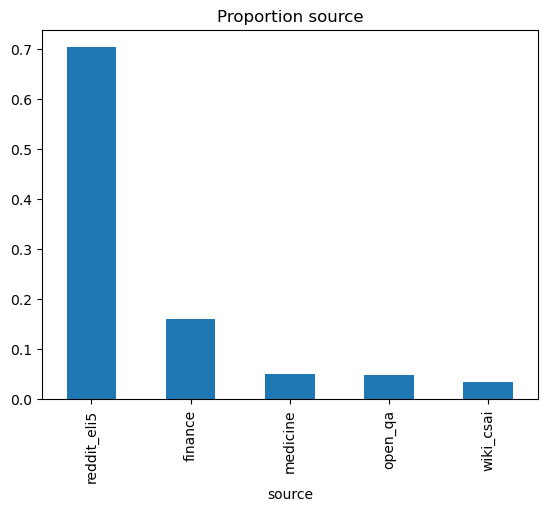

In [51]:
dfall.value_counts('source', normalize=True).plot(kind="bar", title= "Proportion source")

Code afin de pouvoir comparer la longueur de réponse humaines et machines 

In [52]:
lenanshum=[]
for ind, row in dfall.iterrows() : 
    long=[]
    for i in range(len(row.human_answers)) :
        long.append(len(row.human_answers[i]))
    lenanshum.append(long)
dfall["lenanshum"]=lenanshum

lenansgpt=[]
for ind, row in dfall.iterrows() : 
    long=[]
    for i in range(len(row.chatgpt_answers)) :
        long.append(len(row.chatgpt_answers[i]))
    lenansgpt.append(long)
dfall["lenansgpt"]=lenansgpt

In [53]:
lstlenrephum=[]
for ind, row in dfall.iterrows():
    for i in range (len(row.lenanshum)):
        lstlenrephum.append(row.lenanshum[i])

<Axes: title={'center': 'Longueur réponse humain'}>

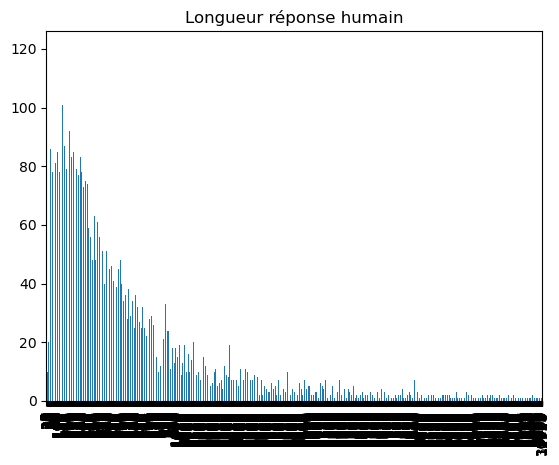

In [54]:
pd.Series(lstlenrephum).value_counts().sort_index().plot(kind="bar", title= "Longueur réponse humain")

In [55]:
lstlenrepgpt=[]
for ind, row in dfall.iterrows():
    for i in range (len(row.lenansgpt)):
        lstlenrepgpt.append(row.lenansgpt[i])

<Axes: title={'center': 'Longueur réponse gpt'}>

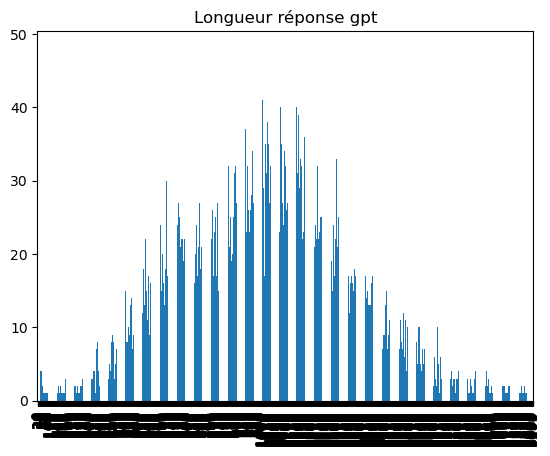

In [56]:
pd.Series(lstlenrepgpt).value_counts().sort_index().plot(kind="bar", title= "Longueur réponse gpt")


### Analyse du second dataset

Import du second dataset

In [57]:
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [58]:
fs.ls("civel/diffusion/hackathon-minarm-2024/AIVSAI")

['civel/diffusion/hackathon-minarm-2024/AIVSAI/.keep',
 'civel/diffusion/hackathon-minarm-2024/AIVSAI/HC3.zip',
 'civel/diffusion/hackathon-minarm-2024/AIVSAI/all.json',
 'civel/diffusion/hackathon-minarm-2024/AIVSAI/hack_train.csv',
 'civel/diffusion/hackathon-minarm-2024/AIVSAI/train.json']

In [59]:
fs.download("civel/diffusion/hackathon-minarm-2024/AIVSAI/hack_train.csv", 'data/hack_train.csv')

[None]

In [60]:
df2= pd.read_csv("data/hack_train.csv")

In [61]:
df2

,text,label,src
0,Little disclaimer: this deals with US laws and...,1,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human
...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human


In [62]:
srcg=[]
for ind, row in df2.iterrows() : 
    if "human" in row.src :
        srcg.append("Human")
    elif "machine" in row.src :
        srcg.append("Machine")
df2["srcg"]=srcg


Proportion des réponses entre humains/machines

<Axes: title={'center': 'Proportion hum/gpt'}, xlabel='srcg'>

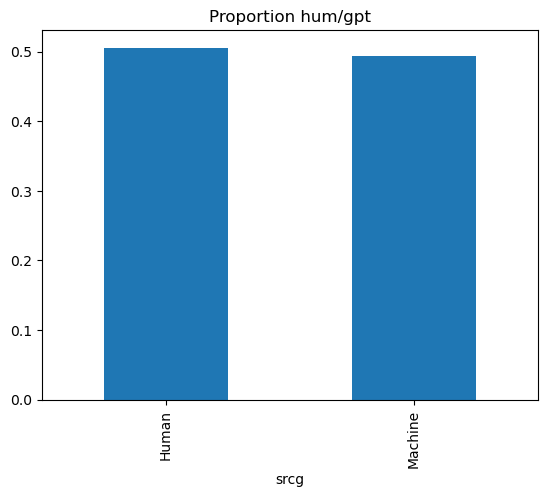

In [63]:
df2.value_counts("srcg", normalize=True).plot(kind="bar", title= "Proportion hum/gpt")

Slicing du dataset en fonction de la source

In [64]:
df2hum=df2[df2.srcg=="Human"]
df2gpt=df2[df2.srcg=="Machine"]

In [65]:
df2hum

,text,label,src,srcg
0,Little disclaimer: this deals with US laws and...,1,cmv_human,Human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human,Human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human,Human
3,"I believe in a flat tax system, where everyone...",1,cmv_human,Human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human,Human
...,...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human,Human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human,Human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human,Human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human,Human


Analyse pour comparer la longueur des réponses humaines et machines

In [66]:
lenrepdf2hum=[]
for i in df2hum.text:
    lenrepdf2hum.append(len(i))

lenrepdf2gpt=[]
for i in df2gpt.text:
    lenrepdf2gpt.append(len(i))

<Axes: title={'center': 'Longueur réponse gpt'}>

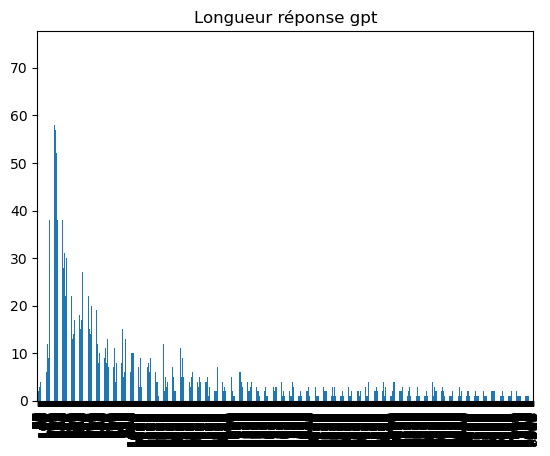

In [67]:
pd.Series(lenrepdf2gpt).value_counts().sort_index().plot(kind="bar", title= "Longueur réponse gpt")

<Axes: title={'center': 'Longueur réponse humain'}>

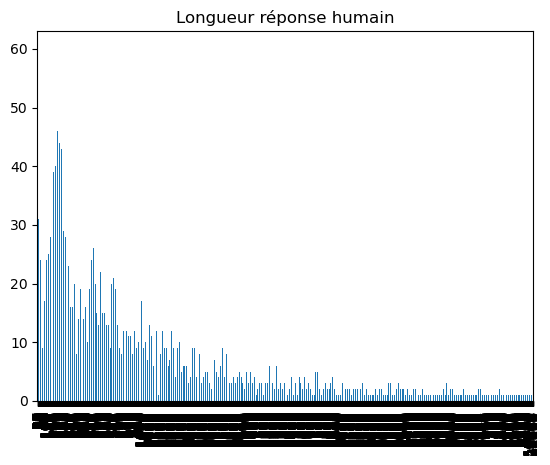

In [68]:
pd.Series(lenrepdf2hum).value_counts().sort_index().plot(kind="bar", title= "Longueur réponse humain")

Mot avec le plus d'occurrence dans les réponses humaines

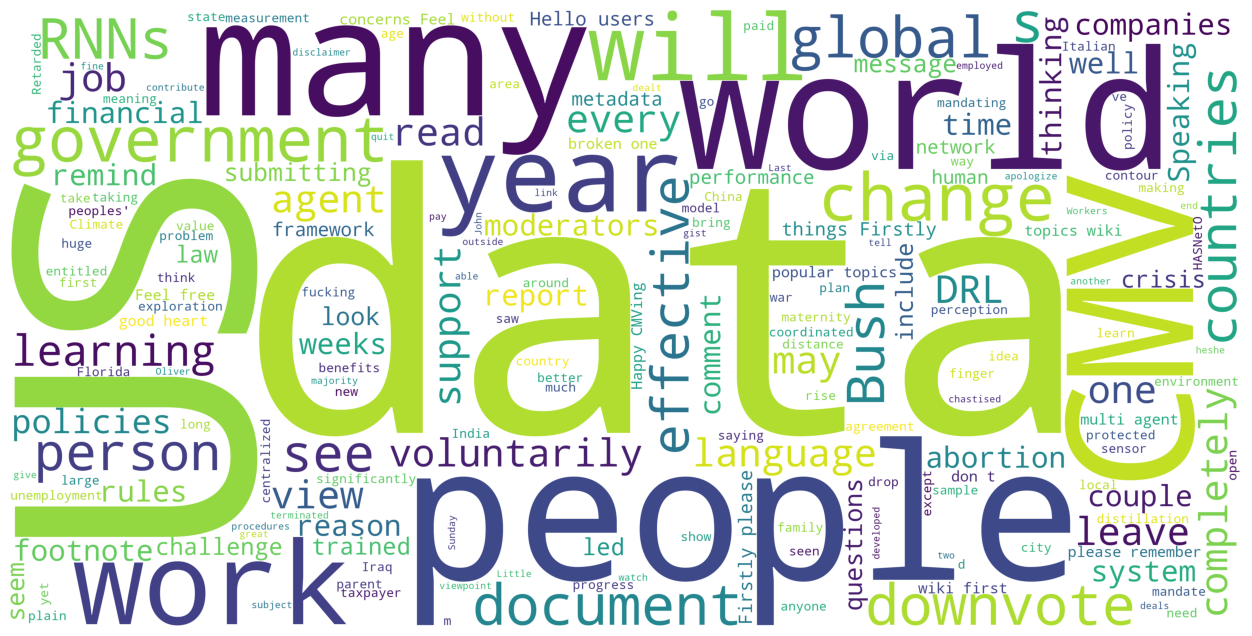

In [69]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)
action_text = df2hum['text'].values
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Mot avec le plus d'occurrence dans les réponses machines

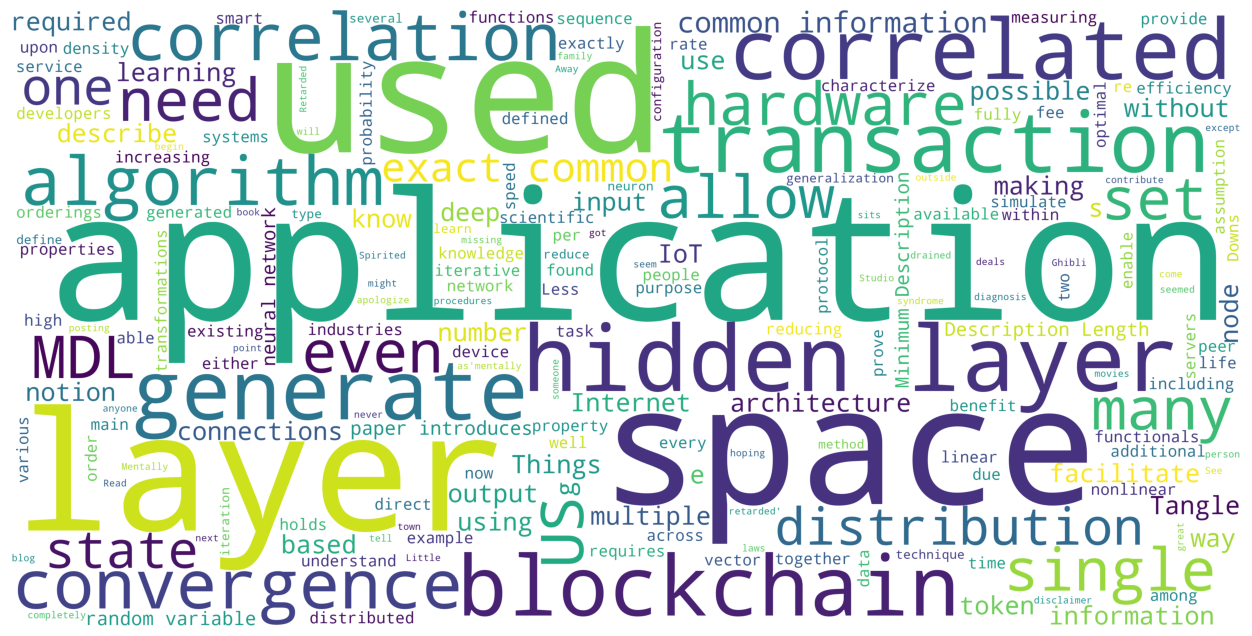

In [70]:
stopwords = set(STOPWORDS)
action_text = df2gpt['text'].values
wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(str(action_text))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()